In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Exploration

In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.select_dtypes(include=['object']).columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [8]:
len(df.CustomerId.unique())

10000

## Dealing with missing values

In [9]:
df.isnull().values.any()

False

## Encoding the categorical data
'Surname', 'Geography', 'Gender'

In [10]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df = df.drop(columns=['RowNumber','CustomerId', 'Surname'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.groupby('Geography').mean(numeric_only=True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [13]:
df.groupby('Gender').mean(numeric_only=True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


### One hot encoding

In [14]:
df=pd.get_dummies(data=df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


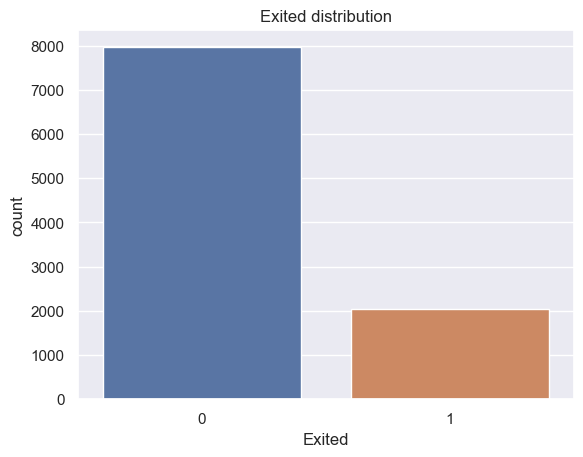

In [15]:
sns.countplot(x='Exited',data=df, label='count')
plt.title("Exited distribution")
plt.show()

In [16]:
# Those staying with the bank
(df.Exited==0).sum()

7963

In [17]:
# Those exiting the bank
(df.Exited==1).sum()

2037

## Correlation and heatmap

In [18]:
df2 = df.drop(columns='Exited')

<Axes: title={'center': 'Correlated with Exited'}>

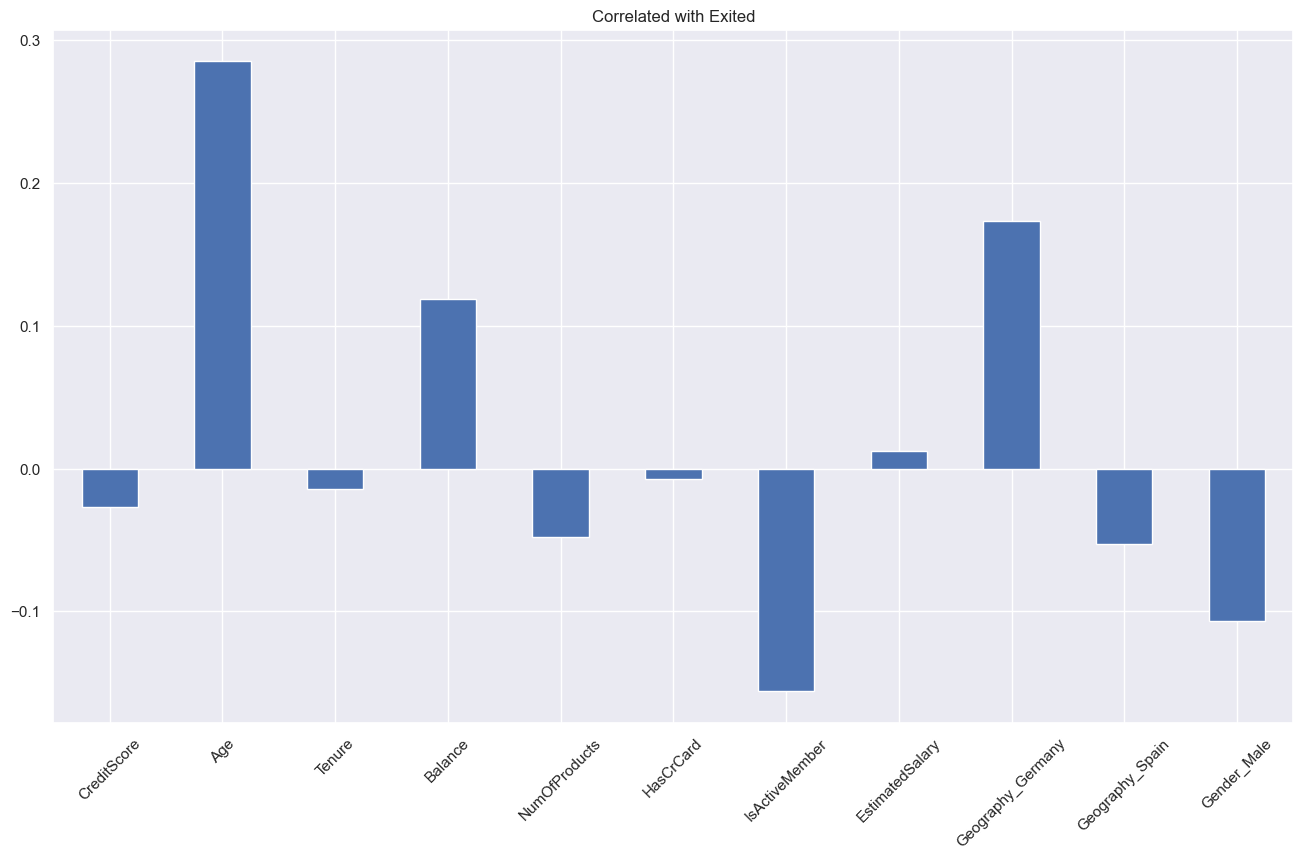

In [19]:
df2.corrwith(df['Exited']).plot.bar(figsize=(16,9), title='Correlated with Exited', grid=True, rot=45)

<Axes: >

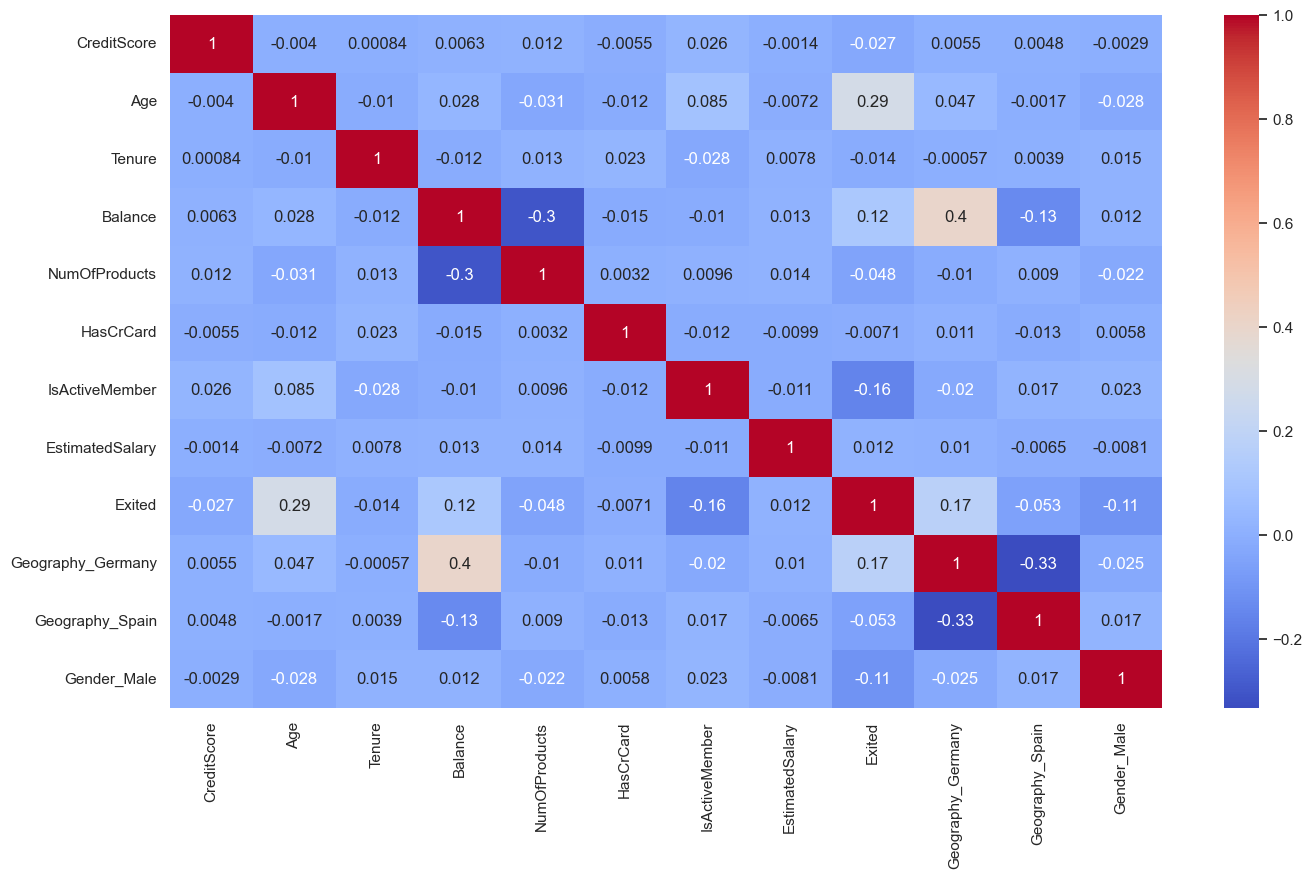

In [20]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

## Spliting the dataset

In [21]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [22]:
# independent features
x = df.drop(columns='Exited')
# Target/dependent feature
y = df['Exited']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
#stratify makes sure that a relative proportion of each class in the target variable are maintained in both training and test sets

## Feature scaling 

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scalar = StandardScaler()

In [27]:
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [28]:
x_train

array([[ 1.058568  ,  1.71508648,  0.68472287, ..., -0.57831252,
        -0.57773517,  0.90750738],
       [ 0.91362605, -0.65993547, -0.6962018 , ...,  1.72916886,
        -0.57773517,  0.90750738],
       [ 1.07927399, -0.18493108, -1.73189531, ...,  1.72916886,
        -0.57773517, -1.10191942],
       ...,
       [ 0.16821031, -0.18493108,  1.3751852 , ..., -0.57831252,
        -0.57773517, -1.10191942],
       [ 0.37527024, -0.37493284,  1.02995403, ..., -0.57831252,
         1.73089688,  0.90750738],
       [ 1.56586482,  1.14508121,  0.68472287, ..., -0.57831252,
         1.73089688,  0.90750738]])

In [29]:
x_test

array([[-0.68073539, -0.27993196,  0.68472287, ..., -0.57831252,
        -0.57773517,  0.90750738],
       [-1.30191518, -0.5649346 , -0.35097064, ...,  1.72916886,
        -0.57773517,  0.90750738],
       [-0.97061929,  0.10007155, -0.35097064, ..., -0.57831252,
         1.73089688, -1.10191942],
       ...,
       [-1.39509214,  0.7650777 ,  1.3751852 , ...,  1.72916886,
        -0.57773517, -1.10191942],
       [ 0.39597623,  0.00507067,  0.68472287, ..., -0.57831252,
        -0.57773517,  0.90750738],
       [ 1.02750901, -0.5649346 , -1.04143297, ..., -0.57831252,
        -0.57773517,  0.90750738]])

## Building the model

### 1. Logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [32]:
ypred = lr.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [34]:
acc = accuracy_score(y_test, ypred)
f1 = f1_score(y_test, ypred)
prec = precision_score(y_test, ypred)
rec = recall_score(y_test, ypred)

In [35]:
result = pd.DataFrame([['Logistic Regression', acc, f1, prec,rec]],
                     columns=['Model', 'Accuracy', 'F1', 'Precision', 'Recall'])
result

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.808,0.283582,0.589147,0.186732


In [36]:
cm = confusion_matrix(y_test, ypred)
print(cm)

[[1540   53]
 [ 331   76]]


In [37]:
acc

0.808

### Cross validation

In [38]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=lr, X=x_train, y=y_train, cv=10)

In [39]:
accuracies

array([0.8125 , 0.80875, 0.81   , 0.80625, 0.81625, 0.80625, 0.80875,
       0.8075 , 0.805  , 0.815  ])

In [40]:
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 80.96 %
Standard Deviation is 0.36 %


## 2. Random forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [42]:
ypred = rf.predict(x_test)

In [43]:
acc = accuracy_score(y_test, ypred)
f1 = f1_score(y_test, ypred)
prec = precision_score(y_test, ypred)
rec = recall_score(y_test, ypred)

In [44]:
model_results = pd.DataFrame([['Random forest', acc, f1, prec, rec]],
                       columns=['Model', 'Accuracy', 'F1', 'Precision', 'Recall'])

In [45]:
result = pd.concat([result, model_results], ignore_index=True)
result

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.8080,0.283582,0.589147,0.186732
1,Random forest,0.8585,0.566616,0.752033,0.454545


In [46]:
cm = confusion_matrix(y_test, ypred)
print(cm)

[[1532   61]
 [ 222  185]]


### Cross validation

In [47]:
accuracies = cross_val_score(estimator=rf, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 86.40 %
Standard Deviation is 1.04 %


### 3. XGBoost

In [48]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [49]:
ypred = xgb.predict(x_test)

In [50]:
acc = accuracy_score(y_test, ypred)
f1 = f1_score(y_test, ypred)
prec = precision_score(y_test, ypred)
rec = recall_score(y_test, ypred)

In [51]:
model_results = pd.DataFrame([['XGBoost classifier', acc, f1, prec, rec]],
                       columns=['Model', 'Accuracy', 'F1', 'Precision', 'Recall'])

In [52]:
result = pd.concat([result, model_results])
result

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.8080,0.283582,0.589147,0.186732
1,Random forest,0.8585,0.566616,0.752033,0.454545
0,XGBoost classifier,0.8530,0.576369,0.696864,0.491400
